In [11]:
import pandas as pd
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
import os
import cv2
import matplotlib.pyplot as plt
import random
from numpy import save
from numpy import savez_compressed
from numpy import load
import pickle

In [12]:
df=pd.read_csv('full_df.csv')

In [13]:
df

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6387,4686,63,Male,4686_left.jpg,4686_right.jpg,severe nonproliferative retinopathy,proliferative diabetic retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4686_left.jpg
6388,4688,42,Male,4688_left.jpg,4688_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4688_left.jpg
6389,4689,54,Male,4689_left.jpg,4689_right.jpg,mild nonproliferative retinopathy,normal fundus,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4689_left.jpg
6390,4690,57,Male,4690_left.jpg,4690_right.jpg,mild nonproliferative retinopathy,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4690_left.jpg


In [7]:
df['Left-Diagnostic Keywords'].unique()

array(['cataract', 'normal fundus',
       'laser spot，moderate non proliferative retinopathy',
       'macular epiretinal membrane',
       'moderate non proliferative retinopathy', 'drusen',
       'epiretinal membrane',
       'moderate non proliferative retinopathy，hypertensive retinopathy',
       'pathological myopia', 'mild nonproliferative retinopathy',
       'hypertensive retinopathy',
       'macular epiretinal membrane，mild nonproliferative retinopathy',
       'macular hole', 'wet age-related macular degeneration',
       'moderate non proliferative retinopathy，laser spot',
       'moderate non proliferative retinopathy，myelinated nerve fibers',
       'dry age-related macular degeneration',
       'epiretinal membrane，myelinated nerve fibers',
       'diabetic retinopathy', 'epiretinal membrane，lens dust', 'atrophy',
       'laser spot，white vessel，moderate non proliferative retinopathy',
       'chorioretinal atrophy',
       'moderate non proliferative retinopathy，catar

In [89]:
def Hypertension(x):
    if 'hypertensive' in x:
        return 1
    else:
        return 0

In [90]:
df["left_Hypertension"] = df["Left-Diagnostic Keywords"].apply(lambda x: Hypertension(x))
df["right_Hypertension"] = df["Right-Diagnostic Keywords"].apply(lambda x: Hypertension(x))

In [91]:
left_hyper = df.loc[(df.left_Hypertension == 1)]["Left-Fundus"].values

In [92]:
right_hyper = df.loc[(df.right_Hypertension == 1)]["Right-Fundus"].values

In [93]:
hypertension = np.concatenate((left_hyper,right_hyper),axis=0)

In [94]:
len(hypertension)

382

In [95]:
def AgeMac(x):
    if 'age-related' in x:
        return 1
    else:
        return 0

In [96]:
df["left_Age"] = df["Left-Diagnostic Keywords"].apply(lambda x: AgeMac(x))
df["right_Age"] = df["Right-Diagnostic Keywords"].apply(lambda x: AgeMac(x))

In [97]:
left_Age = df.loc[(df.left_Age == 1)]["Left-Fundus"].values
right_Age = df.loc[(df.right_Age == 1)]["Right-Fundus"].values
Agemacu = np.concatenate((left_Age,right_Age),axis=0)

In [98]:
len(Agemacu)

551

In [99]:
def glau(x):
    if 'glaucoma' in x:
        return 1
    else:
        return 0

In [100]:
df["left_glau"] = df["Left-Diagnostic Keywords"].apply(lambda x: glau(x))
df["right_glau"] = df["Right-Diagnostic Keywords"].apply(lambda x: glau(x))

In [101]:
left_ = df.loc[(df.left_glau == 1)]["Left-Fundus"].values
right_ = df.loc[(df.right_glau == 1)]["Right-Fundus"].values
glaucoma = np.concatenate((left_,right_),axis=0)

In [102]:
len(glaucoma)

616

In [14]:
def myopia(x):
    if 'myopia' in x:
        return 1
    else:
        return 0

In [15]:
df["left_myopia"] = df["Left-Diagnostic Keywords"].apply(lambda x: myopia(x))
df["right_myopia"] = df["Right-Diagnostic Keywords"].apply(lambda x: myopia(x))

In [16]:
left_ = df.loc[(df.left_myopia == 1)]["Left-Fundus"].values
right_ = df.loc[(df.right_myopia == 1)]["Right-Fundus"].values
myopia = np.concatenate((left_,right_),axis=0)

In [17]:
len(myopia)

479

In [107]:
def normal(x):
    if 'normal' in x:
        return 1
    else:
        return 0

In [108]:
df["left_normal"] = df["Left-Diagnostic Keywords"].apply(lambda x: normal(x))
df["right_"] = df["Right-Diagnostic Keywords"].apply(lambda x: normal(x))

In [109]:
normal = df.loc[(df.N == 1)]["filename"].values


In [110]:
len(normal)

2101

In [111]:
df.labels.value_counts()

['N']    2873
['D']    1608
['O']     708
['C']     293
['G']     284
['A']     266
['M']     232
['H']     128
Name: labels, dtype: int64

In [112]:
other=df.loc[(df.O == 1)]["filename"].values

In [113]:
len(other)

1588

In [114]:
diabetes=df.loc[(df.D == 1)]["filename"].values

In [115]:
len(diabetes)

2123

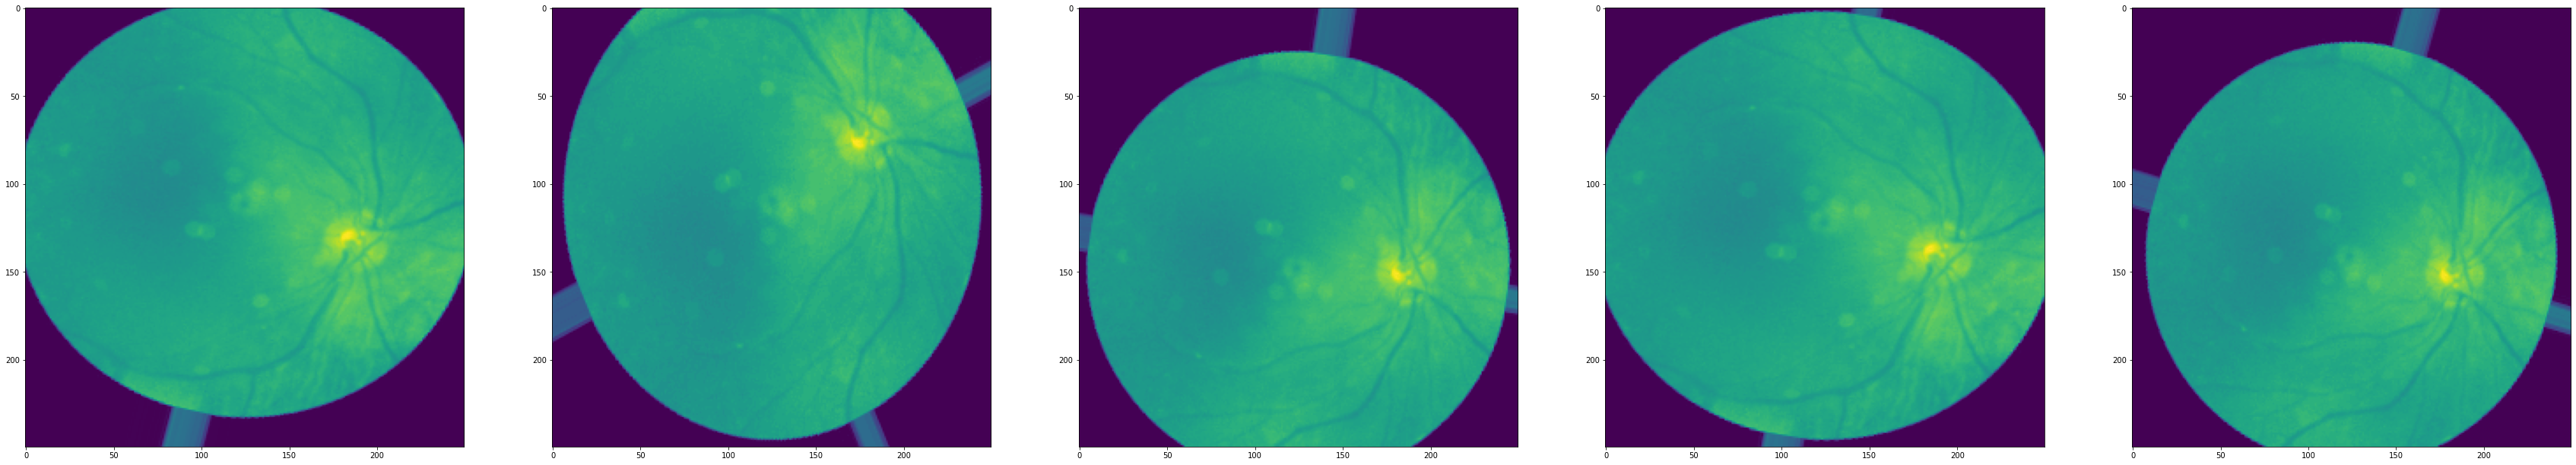

In [116]:
img= cv2.imread(f"Datos/preprocessed_2/24_left.jpg",0)
img = cv2.resize(img, (250,250))
img = img.astype(np.float32)/255
img = img.reshape((1,) + img.shape)
img = img[..., np.newaxis]
train_datagen = ImageDataGenerator(
                    rotation_range=30,
                    zoom_range=0.1,
                    vertical_flip=True,
                    brightness_range=(0.2, 1.5),
                    height_shift_range=0.1)
i = 0
count=1
f = plt.figure(figsize=(60,30))
it = train_datagen.flow(x=img, batch_size=1)
for i in range(5):
    ax = f.add_subplot(2, 5,count)
    
    batch = it.next()
    aug_img = batch[0]
    ax = plt.imshow(aug_img)
    count=count +1
plt.show()

In [33]:
Data=[]

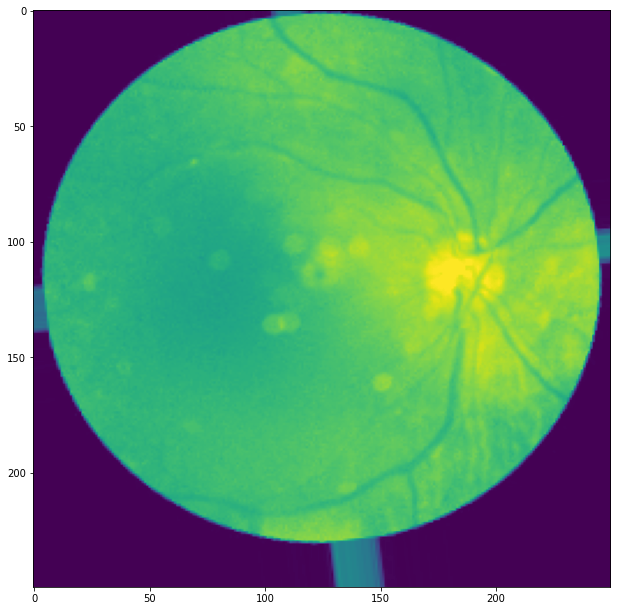

In [39]:
img= cv2.imread(f"Datos/preprocessed_2/24_left.jpg",0)
img = cv2.resize(img, (250,250))
img = img.astype(np.float32)/255
img = img.reshape((1,) + img.shape)
img = img[..., np.newaxis]
train_datagen = ImageDataGenerator(
                    rotation_range=30,
                    zoom_range=0.1,
                    vertical_flip=True,
                    brightness_range=(0.2, 1.3),
                    height_shift_range=0.1)
count=1
f = plt.figure(figsize=(60,30))
it = train_datagen.flow(x=img, batch_size=1)
for i in range(1):
    ax = f.add_subplot(2, 5,count)
    batch = it.next()
    aug_img = batch[0]
    Data.append(aug_img)
    ax = plt.imshow(aug_img)
    count=count +1
plt.show()

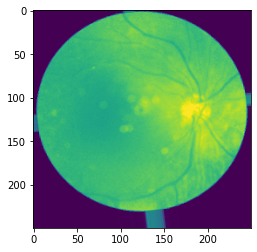

In [41]:
for i in Data:
    ax = plt.imshow(i)

In [120]:
def augment(category,label,mult):
    x=[]
    for img in category:
        try:
            img = cv2.imread(f"Datos/preprocessed_2/{img}",0)
            img = cv2.resize(img, (250,250))
            img = img.astype(np.float32)/255
            img = img[..., np.newaxis]
        except:
            continue
        train_datagen = ImageDataGenerator(
                    rotation_range=30,
                    zoom_range=0.1,
                    vertical_flip=True,
                    brightness_range=(0.2, 1.5),
                    height_shift_range=0.1,
                    )
        img = img.reshape((1,) + img.shape)
        count=1
        it = train_datagen.flow(x=img, batch_size=1)
        for i in range(mult):
            batch = it.next()
            aug_img = batch[0]
            aug_img=aug_img.reshape(-1)
            x.append([np.array(img),np.array(label)])
            count=count +1
       
    for i in range(len(x)):
        x[i][0]=x[i][0].reshape(x[i][0].shape[1:])
    return x

In [121]:
Myopia_aumentada=augment(myopia,5,5)

In [122]:
Hypertension_aumentada=augment(hypertension,2,6)

In [123]:
Glaucoma_aumentada=augment(glaucoma,1, 3)

In [124]:
Agemacu_aumentada=augment(Agemacu, 3,4)

In [18]:
def create_dataset(image_category,label):
    dataset_dir = "Datos/preprocessed_2"
    image_size=250
    labels = []
    dataset = []
    for img in image_category:
        image_path = os.path.join(dataset_dir,img)
        try:
            img = cv2.imread(image_path,0)
            img = cv2.resize(img, (250,250))
            img = img.astype(np.float32)/255
            img = img[..., np.newaxis]
            
        except:
            continue
        
        dataset.append([np.array(img),np.array(label)])
    random.shuffle(dataset)
    return dataset

In [19]:
Myopia=create_dataset(myopia,5)

In [127]:
Hypertension=create_dataset(hypertension,2)

In [128]:
Glaucoma= create_dataset(glaucoma,1)

In [129]:
Age_macu=create_dataset(Agemacu,3)

In [130]:
Normal= create_dataset(normal,0)

In [131]:
Diabetes=create_dataset(diabetes,4)

In [132]:
Other=create_dataset(other,6)

In [28]:
Myopia

(250, 250, 1)

In [134]:
FULLMYOPIA=Myopia+Myopia_aumentada

In [135]:
MyopioNO=FULLMYOPIA+Normal

In [29]:
x = np.array([i[0]for i in Myopia])
y = np.array([i[1] for i in Myopia])

In [30]:
x.shape

(473, 250, 250, 1)

In [137]:
for i in range(len(y)):
    if y[i]==5:
        y[i]=1

In [138]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense, Conv2D
model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(250,250,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

2021-12-11 23:54:59.539111: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/eduardo/anaconda3/envs/Project/lib/python3.9/site-packages/cv2/../../lib64:
2021-12-11 23:54:59.543146: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-12-11 23:54:59.546030: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (LAPTOP-OJ530OIS): /proc/driver/nvidia/version does not exist
2021-12-11 23:54:59.569955: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.

In [ ]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [ ]:
model.fit(x_train, y_train, epochs=5,verbose=1,shuffle = True, validation_data=(x_test,y_test))

In [65]:
x.shape

(2838, 250, 250, 1)

In [85]:
save('x',x)

In [80]:
y[0]

5